In [1]:
%matplotlib inline

In [2]:
import os,sys,glob
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pygeotools.lib import iolib,geolib,malib,warplib,timelib
from imview import pltlib
from itertools import combinations
from distutils.spawn import find_executable

In [3]:
%cd /nobackup/sbhusha1/oic_challenge/mount_blanc_massif/results/asp_mgm/

/nobackupp11/sbhusha1/oic_challenge/mount_blanc_massif/results/asp_mgm


In [4]:
phr_ew_fn_list = sorted(glob.glob('PHR_Ortho/VELOCITY/EW_*.tif'))
phr_ns_fn_list = sorted(glob.glob('PHR_Ortho/VELOCITY/NS_*.tif'))

In [5]:
ew_ds_list = warplib.memwarp_multi_fn(phr_ew_fn_list,res=4)
ns_ds_list = warplib.memwarp_multi_fn(phr_ns_fn_list,res=4)


Warping all inputs to the following:
Resolution: 4.0
Extent: [340214.82350205845, 5087233.349045876, 348393.67575514066, 5092985.178645206]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 3: PHR_Ortho/VELOCITY/EW_20200809-20200917_vel_mean.tif
nl: 1438 ns: 2045 res: 4.000
0...10...20...30...40...50...60...70...80...90...2 of 3: PHR_Ortho/VELOCITY/EW_20200809-20210815_vel_mean.tif
nl: 1438 ns: 2045 res: 4.000
100 - done.
0...10...20...30...40...50...60...70...80...90...3 of 3: PHR_Ortho/VELOCITY/EW_20200917-20210815_vel_mean.tif
nl: 1438 ns: 2045 res: 4.000
100 - done.
0...10...20...30...40...50...60...70...80...90...
Warping all inputs to the following:
Resolution: 4.0
Extent: [340214.82350205845, 5087233.349045876, 348393.67575514066, 5092985.178645206]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 3: PHR_Ortho/VELOCITY/NS_20200809-20200917_vel_mean.tif
nl: 1438 ns: 2045 res: 4.000
100 - done.
0

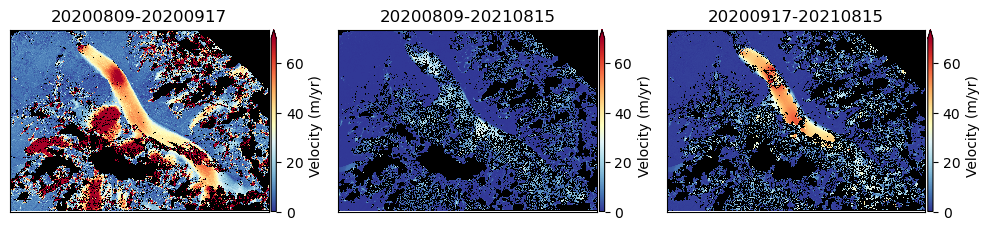

In [8]:
f,ax = plt.subplots(1,3,figsize=(10,10))
clim = (0,70)
for idx,ds in enumerate(ew_ds_list):
    vx = iolib.ds_getma(ds)
    vy = iolib.ds_getma(ns_ds_list[idx])
    title = os.path.basename(phr_ew_fn_list[idx]).split('EW_')[1].split('_vel_mean')[0]
    pltlib.iv(np.ma.sqrt(vx**2+vy**2),title=title,label='Velocity (m/yr)',cmap='RdYlBu_r',ax=ax[idx],clim=clim)

In [9]:
phr_ew_fn_list = sorted(glob.glob('Sentinel2/VELOCITY/EW_*.tif'))
phr_ns_fn_list = sorted(glob.glob('Sentinel2/VELOCITY/NS_*.tif'))

In [10]:
ew_ds_list = warplib.memwarp_multi_fn(phr_ew_fn_list)
ns_ds_list = warplib.memwarp_multi_fn(phr_ns_fn_list)


Warping all inputs to the following:
Resolution: 10.0
Extent: [320610.0, 5064770.0, 353850.0, 5100000.0]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 3: Sentinel2/VELOCITY/EW_20200812-20200916_vel_mean.tif
2 of 3: Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif
3 of 3: Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif

Warping all inputs to the following:
Resolution: 10.0
Extent: [320610.0, 5064770.0, 353850.0, 5100000.0]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 3: Sentinel2/VELOCITY/NS_20200812-20200916_vel_mean.tif
2 of 3: Sentinel2/VELOCITY/NS_20200812-20210812_vel_mean.tif
3 of 3: Sentinel2/VELOCITY/NS_20200916-20210812_vel_mean.tif


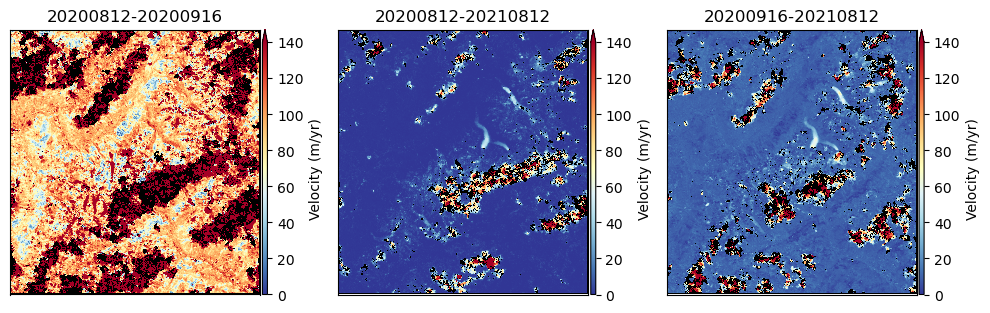

In [12]:
f,ax = plt.subplots(1,3,figsize=(10,10))
clim = (0,140)
for idx,ds in enumerate(ew_ds_list):
    vx = iolib.ds_getma(ds)
    vy = iolib.ds_getma(ns_ds_list[idx])
    title = os.path.basename(phr_ew_fn_list[idx]).split('EW_')[1].split('_vel_mean')[0]
    pltlib.iv(np.ma.sqrt(vx**2+vy**2),title=title,label='Velocity (m/yr)',cmap='RdYlBu_r',ax=ax[idx],clim=clim)

In [26]:
asp_mgm_vx_fn = 'Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif'
asp_mgm_vy_fn = 'Sentinel2/VELOCITY/NS_20200812-20210812_vel_mean.tif'

asp_block_vx_fn = '../asp_block/Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif'
asp_block_vy_fn = '../asp_block/Sentinel2/VELOCITY/NS_20200812-20210812_vel_mean.tif'

autorift_vx_fn = '../quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif'
autorift_vy_fn = '../quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/NS_20200812-20210812_vel_mean.tif'

geofolki_vx_fn = '../eric/Site1/Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif'
geofolki_vy_fn = '../eric/Site1/Sentinel2/VELOCITY/NS_20200812-20210812_vel_mean.tif'



In [27]:
%matplotlib widget


Warping all inputs to the following:
Resolution: 10.0
Extent: [320610.0, 5064770.0, 353850.0, 5100000.0]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif
2 of 4: ../asp_block/Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif
3 of 4: ../quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif
4 of 4: ../eric/Site1/Sentinel2/VELOCITY/EW_20200812-20210812_vel_mean.tif

Warping all inputs to the following:
Resolution: 10.0
Extent: [320610.0, 5064770.0, 353850.0, 5100000.0]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: Sentinel2/VELOCITY/NS_20200812-20210812_vel_mean.tif
2 of 4: ../asp_block/Sentinel2/VELOCITY/NS_20200812-20210812_vel_mean.tif
3 of 4: ../quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/NS_20200812-20210812_vel_mean.tif
4 of 4: ../eric/Site1/Sentinel2/VELOCITY/NS_20200812-20210812_vel_m

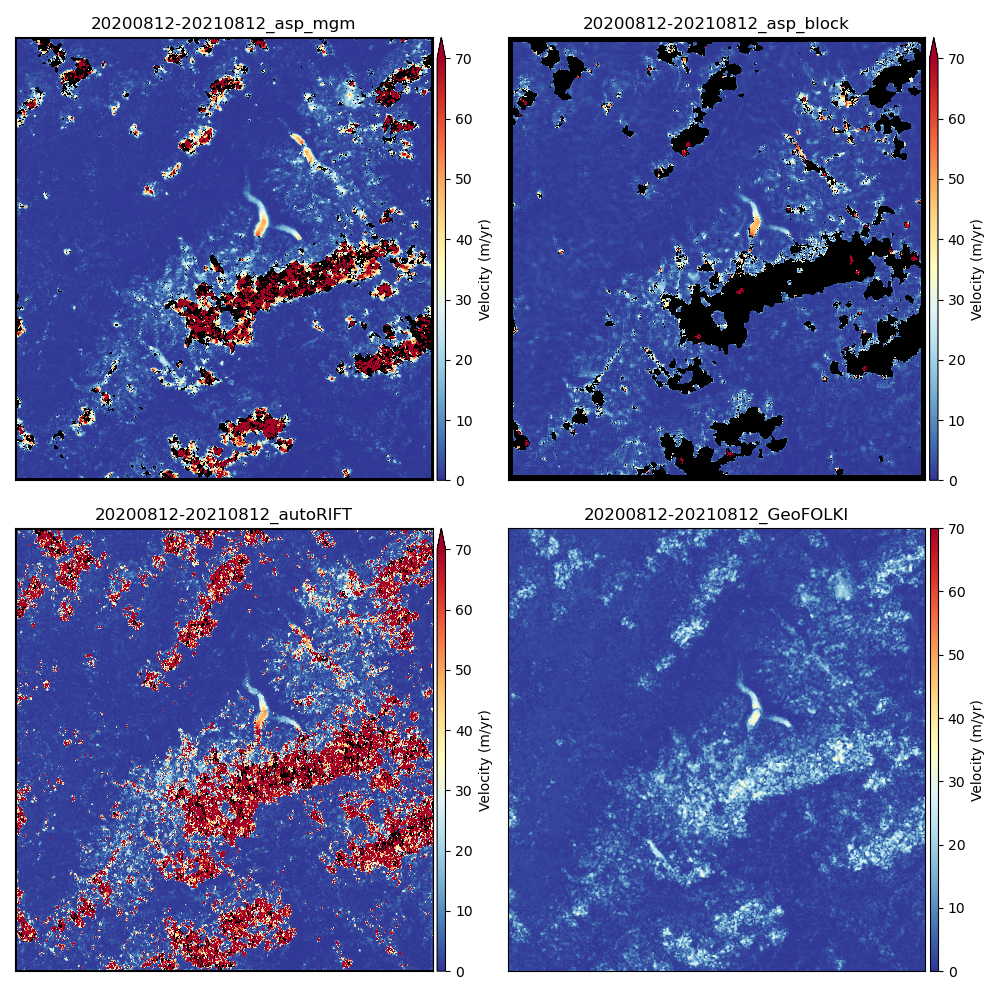

In [29]:
f,axa = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax = axa.ravel()
clim = (0,70)
ew_ds_list = warplib.memwarp_multi_fn([asp_mgm_vx_fn,asp_block_vx_fn,autorift_vx_fn,geofolki_vx_fn])
ns_ds_list = warplib.memwarp_multi_fn([asp_mgm_vy_fn,asp_block_vy_fn,autorift_vy_fn,geofolki_vy_fn])
software = ['asp_mgm','asp_block','autoRIFT','GeoFOLKI']
for idx,ds in enumerate(ew_ds_list):
    vx = iolib.ds_getma(ds)
    vy = iolib.ds_getma(ns_ds_list[idx])
    title = f"20200812-20210812_{software[idx]}"
    pltlib.iv(np.ma.sqrt(vx**2+vy**2),title=title,label='Velocity (m/yr)',cmap='RdYlBu_r',ax=ax[idx],clim=clim)

In [32]:
asp_mgm_vx_fn = 'Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif'
asp_mgm_vy_fn = 'Sentinel2/VELOCITY/NS_20200916-20210812_vel_mean.tif'

asp_block_vx_fn = '../asp_block/Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif'
asp_block_vy_fn = '../asp_block/Sentinel2/VELOCITY/NS_20200916-20210812_vel_mean.tif'

autorift_vx_fn = '../quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif'
autorift_vy_fn = '../quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/NS_20200916-20210812_vel_mean.tif'

geofolki_vx_fn = '../eric/Site1/Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif'
geofolki_vy_fn = '../eric/Site1/Sentinel2/VELOCITY/NS_20200916-20210812_vel_mean.tif'


Warping all inputs to the following:
Resolution: 10.0
Extent: [320610.0, 5064770.0, 353850.0, 5100000.0]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif
2 of 4: ../asp_block/Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif
3 of 4: ../quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif
4 of 4: ../eric/Site1/Sentinel2/VELOCITY/EW_20200916-20210812_vel_mean.tif

Warping all inputs to the following:
Resolution: 10.0
Extent: [320610.0, 5064770.0, 353850.0, 5100000.0]
Projection: '+proj=utm +zone=32 +datum=WGS84 +units=m +no_defs'
Resampling alg: cubic

1 of 4: Sentinel2/VELOCITY/NS_20200916-20210812_vel_mean.tif
2 of 4: ../asp_block/Sentinel2/VELOCITY/NS_20200916-20210812_vel_mean.tif
3 of 4: ../quinn/OIC_mount_blanc_massif_glacier/Sentinel2/VELOCITY/NS_20200916-20210812_vel_mean.tif
4 of 4: ../eric/Site1/Sentinel2/VELOCITY/NS_20200916-20210812_vel_m

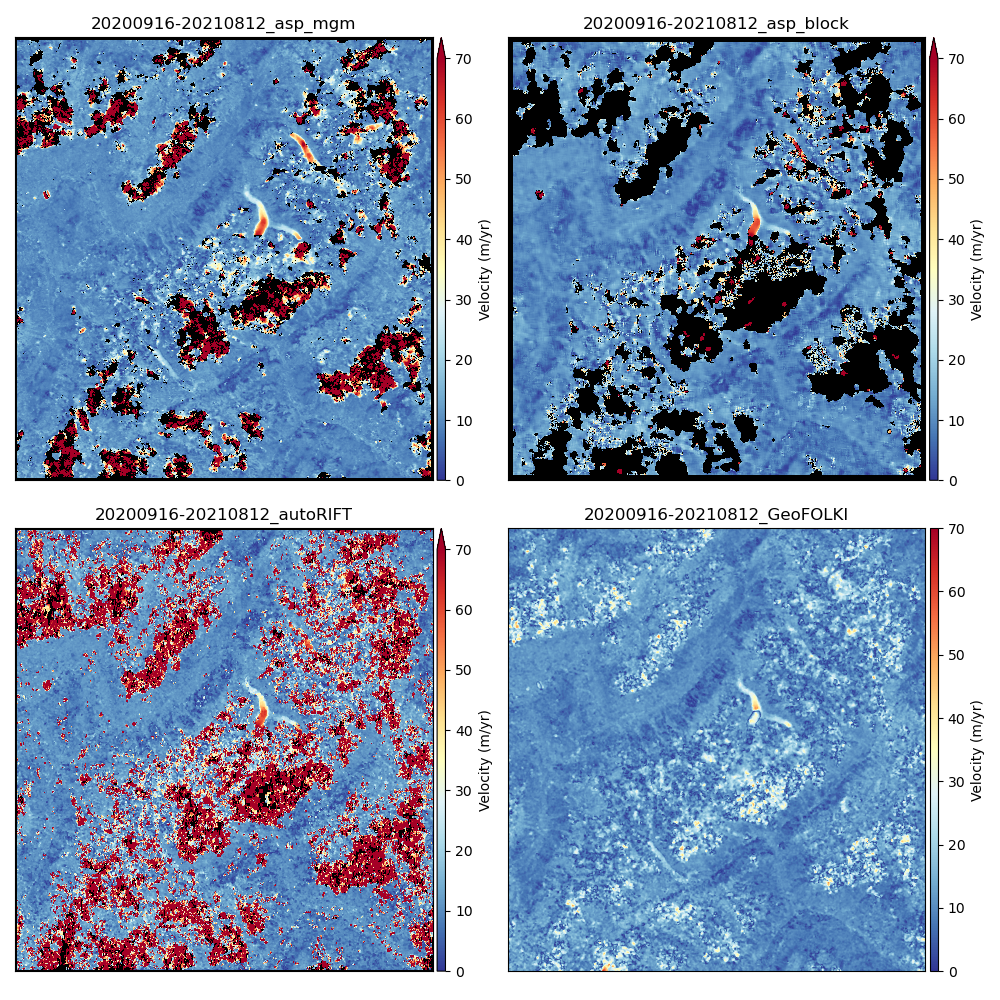

In [33]:
f,axa = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
ax = axa.ravel()
clim = (0,70)
ew_ds_list = warplib.memwarp_multi_fn([asp_mgm_vx_fn,asp_block_vx_fn,autorift_vx_fn,geofolki_vx_fn])
ns_ds_list = warplib.memwarp_multi_fn([asp_mgm_vy_fn,asp_block_vy_fn,autorift_vy_fn,geofolki_vy_fn])
software = ['asp_mgm','asp_block','autoRIFT','GeoFOLKI']
for idx,ds in enumerate(ew_ds_list):
    vx = iolib.ds_getma(ds)
    vy = iolib.ds_getma(ns_ds_list[idx])
    title = f"20200916-20210812_{software[idx]}"
    pltlib.iv(np.ma.sqrt(vx**2+vy**2),title=title,label='Velocity (m/yr)',cmap='RdYlBu_r',ax=ax[idx],clim=clim)